In [2]:
import pandas as pd
import matplotlib.pyplot as mp
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

#Data Reading
tuition_df = pd.read_csv("tuition_cost .csv")
salaryPot_df = pd.read_csv("salary_potential.csv")
print(tuition_df)
print(salaryPot_df)



                                         name       state state_code     type  \
0                         Harvey Mudd College  California         CA  Private   
1                       University of Chicago    Illinois         IL  Private   
2                         Columbia University    New York         NY  Private   
3                             Barnard College    New York         NY  Private   
4                             Scripps College  California         CA  Private   
...                                       ...         ...        ...      ...   
2968              West Hills College: Lemoore  California         CA   Public   
2969  New Mexico State University at Carlsbad  New Mexico         NM   Public   
2970                 Clovis Community College  New Mexico         NM   Public   
2971                   College of the Canyons  California         CA   Public   
2972                   Luna Community College  New Mexico         NM   Public   

     degree_length  room_an

In [6]:
#Getting the first few accounts of data 
#Checking what columns are needed for evaluation
tuition_df.head()

#Dropping unecessary columns
new_tuition_df = tuition_df.drop(columns=['room_and_board', 'in_state_tuition', 'out_of_state_tuition'])


In [8]:

#Same thing with salary potential dataframe
salaryPot_df.head()
new_salaryPot_df = salaryPot_df.drop(columns=['stem_percent', 'make_world_better_percent'])

In [9]:
#Combining the csv files
comboSalaryTuition = pd.merge(new_tuition_df, new_salaryPot_df, on='name')
comboSalaryTuition.head()

,name,state,state_code,type,degree_length,in_state_total,out_of_state_total,rank,state_name,early_career_pay,mid_career_pay
0,Harvey Mudd College,California,CA,Private,4 Year,75003,75003,1,California,88800,158200
1,University of Chicago,Illinois,IL,Private,4 Year,74580,74580,4,Illinois,64000,114200
2,Barnard College,New York,NY,Private,4 Year,72257,72257,19,New-York,59200,109800
3,Trinity College,Connecticut,CT,Private,4 Year,71660,71660,5,Connecticut,60100,110900
4,University of Southern California,California,CA,Private,4 Year,71620,71620,11,California,64500,120600


In [10]:
tuition_cost_salary_potential = comboSalaryTuition.drop(columns=['rank', 'degree_length'])

<Axes: xlabel='early_career_pay', ylabel='mid_career_pay'>

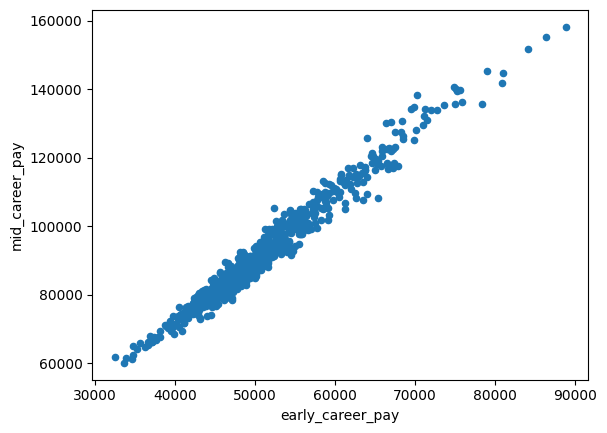

In [11]:
#Checking to see if a higher early career pay leads to a higher mid career pay
tuition_cost_salary_potential.plot(x='early_career_pay', y='mid_career_pay', kind='scatter')

<h3>It seems that this previous graph shows a linear trend. In order to further analyze it, I will be using a linear regression model through seaborn.<h3>

<Axes: xlabel='early_career_pay', ylabel='mid_career_pay'>

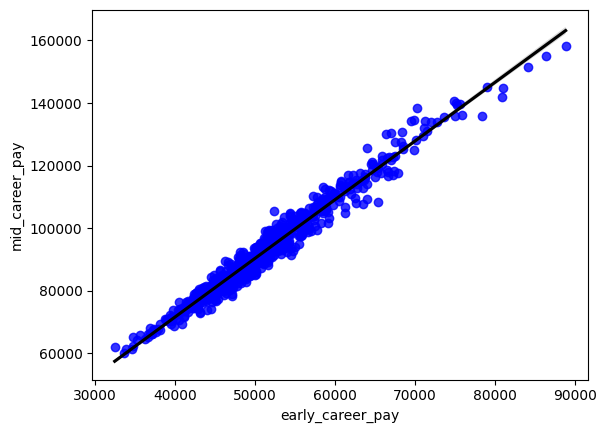

In [12]:
#Creating a linear trendline first from the previous model
sns.regplot(x = 'early_career_pay', y = 'mid_career_pay', data=tuition_cost_salary_potential,
            scatter_kws={"color": "blue"}, line_kws={"color": "black"}
            )



In [13]:
#Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(tuition_cost_salary_potential[['mid_career_pay']].values, tuition_cost_salary_potential.early_career_pay)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[0.51634798]
3402.372064410585


<h4>According to the above code output, we can now have an equation pertaining to the trend line seen on the scatter plot. 

Y = 3402.372064410585 + 0.51634798x

Meaning: For every dollar increase in early career pay, the mid career pay will also increase by $0.516

If the early career pay was 0, the mid career pay would start out at $3402.37 (Isn't really applicable to the situation, but just explaining the trend found)<h4>

In [15]:
#Determining the R^2 metric
r2_score(
    y_true= tuition_cost_salary_potential.early_career_pay,
    y_pred= lin_reg.predict(tuition_cost_salary_potential[['mid_career_pay']])
)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.9697233715384078

<h3>From the above code that was executed, we can see that the R^2 value is ~0.97, meaning that the linear model fits the data very well. The equation could be very useful for predicting mid career salaries based on early career ones.<h3>

<Axes: xlabel='in_state_total', ylabel='early_career_pay'>

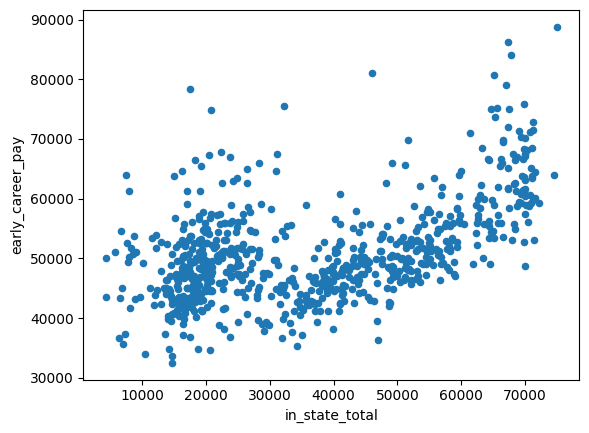

In [16]:
#Further analysis to see if higher tuition affects early career pay
tuition_cost_salary_potential.plot(x='in_state_total', y='early_career_pay', kind='scatter')

<h3>At first glance, this data seems to be all over the place, but for good measure, we can see if there is any trend between the two variables.<h3>

<Axes: xlabel='in_state_total', ylabel='early_career_pay'>

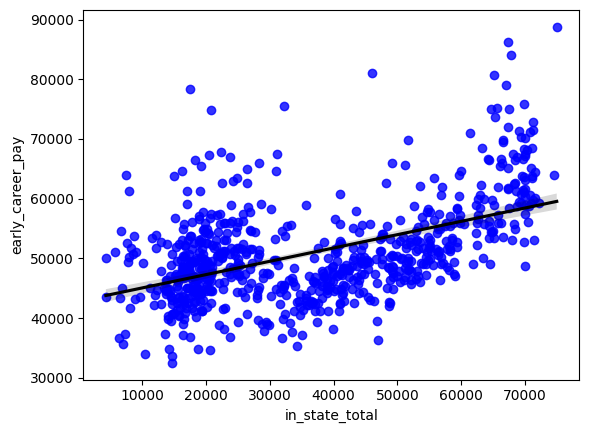

In [17]:

sns.regplot(x = 'in_state_total', y = 'early_career_pay', data=tuition_cost_salary_potential,
            scatter_kws={"color": "blue"}, line_kws={"color": "black"}
            )

In [37]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(tuition_cost_salary_potential[['early_career_pay']].values, tuition_cost_salary_potential.in_state_total)
print(lin_reg_2.coef_)
print(lin_reg_2.intercept_)

[1.14277549]
-21670.142877683094


<h3>Here we end up with the equation:
Y = -21670.14 + 1.14x; meaning that for every in state tutition dollar increase, the mid career pay increases by $1.14<h3>

In [18]:
r2_score(
    y_true= tuition_cost_salary_potential.in_state_total,
    y_pred= lin_reg.predict(tuition_cost_salary_potential[['early_career_pay']])
)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.04362497774438012

<h3>From the above R^2 score, we can see that there is little to no correlation at all between the early career pay and in state tuition.<h3>

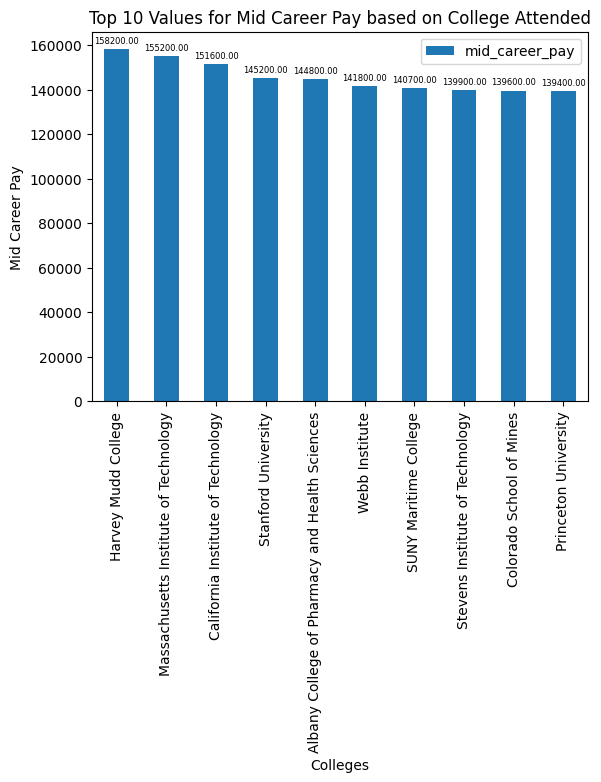

In [19]:
#Bar Graph for top 10 collges in terms of the mid_career_pay
x_value = 'name'
y_value = 'mid_career_pay'
filter_amt = 10

top_10 = tuition_cost_salary_potential.nlargest(filter_amt, y_value)

labels = top_10.plot(kind = 'bar', x = x_value, y = y_value, legend = True)

mp.xlabel('Colleges')
mp.ylabel('Mid Career Pay')
mp.title('Top 10 Values for Mid Career Pay based on College Attended')

for p in labels.patches:
    labels.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize = 6)

mp.show()



In [41]:
#Aggregating data based on type (average data for specific type)
TypeofCollege_df = tuition_cost_salary_potential.drop(columns=['state_name', 'state_code', 'name', 'state'])
aggregationType = TypeofCollege_df.groupby('type').mean().reset_index()
print(aggregationType)

         type  in_state_total  out_of_state_total  early_career_pay  \
0  For Profit    30887.000000        30887.000000      44800.000000   
1     Private    47574.789357        47574.789357      52011.529933   
2      Public    18651.097826        30215.742754      49311.594203   

   mid_career_pay  
0    82400.000000  
1    94359.423503  
2    88545.289855  


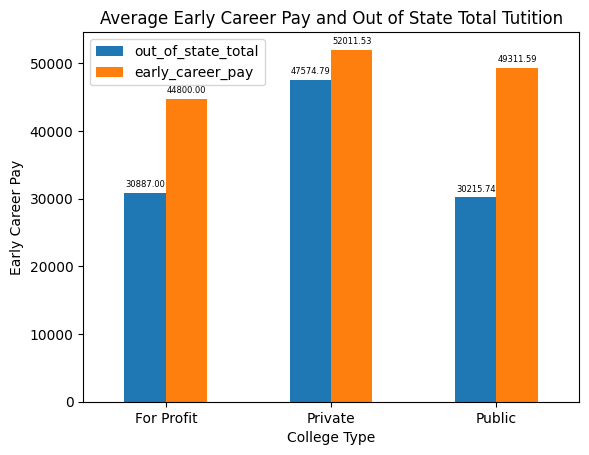

In [42]:


perType = aggregationType.plot(x="type", y=["out_of_state_total", "early_career_pay"], kind="bar", rot=0)

mp.xlabel('College Type')
mp.ylabel('Early Career Pay')
mp.title('Average Early Career Pay and Out of State Total Tutition')

for p in perType.patches:
    perType.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize = 6)

mp.show()



<h3>As we can see with these bar graphs, private colleges have the highest out of state tuition, but have the highest average early career pay. It's something to consider when looking for colleges. Is it worth to pay more, if you get more out of it? Although public comes in at a close second for early pay, but you don't have to spend as much on college. <h3>